In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np

In [3]:
# Maenejo simplificado de archivos
files = os.listdir('./Datasets/')
files = [ file for file in files if not(file.endswith('.pdf'))  ]
dict_files = {'df{}'.format(i+1): file for i, file in enumerate(files)}

In [2]:
df = pd.read_csv("./Datasets_clean/taxi_zones.csv")

In [3]:
df.head()

,Unnamed: 0,"OBJECTID,N,9,0","Shape_Leng,N,19,11","Shape_Area,N,19,11","zone,C,254","LocationID,N,4,0","borough,C,254"
0,0,1,"0,116357453189","0,0007823067885",Newark Airport,1,EWR
1,1,2,"0,43346966679","0,00486634037837",Jamaica Bay,2,Queens
2,2,3,"0,0843411059012","0,000314414156821",Allerton/Pelham Gardens,3,Bronx
3,3,4,"0,0435665270921","0,000111871946192",Alphabet City,4,Manhattan
4,4,5,"0,0921464898574","0,000497957489363",Arden Heights,5,Staten Island


In [4]:
df.shape

(263, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          263 non-null    int64 
 1   OBJECTID,N,9,0      263 non-null    int64 
 2   Shape_Leng,N,19,11  263 non-null    object
 3   Shape_Area,N,19,11  263 non-null    object
 4   zone,C,254          263 non-null    object
 5   LocationID,N,4,0    263 non-null    int64 
 6   borough,C,254       263 non-null    object
dtypes: int64(3), object(4)
memory usage: 14.5+ KB


In [6]:
df.isna().sum()

Unnamed: 0            0
OBJECTID,N,9,0        0
Shape_Leng,N,19,11    0
Shape_Area,N,19,11    0
zone,C,254            0
LocationID,N,4,0      0
borough,C,254         0
dtype: int64

In [7]:
df.columns

Index(['Unnamed: 0', 'OBJECTID,N,9,0', 'Shape_Leng,N,19,11',
       'Shape_Area,N,19,11', 'zone,C,254', 'LocationID,N,4,0',
       'borough,C,254'],
      dtype='object')

In [8]:
df.to_csv('./Datasets_clean/taxi_zones.csv')

ETL Inicial, archivo: Light Duty Vehicles.csv

In [4]:
dict_files['df5']

'Light Duty Vehicles.csv'

In [5]:
df1 = pd.read_csv('./Datasets/' + dict_files['df5'])
df1.head()

,Vehicle ID,Fuel ID,Fuel Configuration ID,Manufacturer ID,Category ID,Model,Model Year,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,...,Manufacturer URL,Category,Fuel Code,Fuel,Fuel Configuration Name,Electric-Only Range,PHEV Total Range,PHEV Type,Notes,Drivetrain
0,13044,45,9.0,365,27,NSX,2022,NaN,NaN,NaN,...,http://www.acura.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
1,12854,45,9.0,377,27,A3,2022,NaN,NaN,NaN,...,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,FWD
2,12842,45,9.0,377,27,A3 quattro,2022,NaN,NaN,NaN,...,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
3,12783,45,9.0,377,27,A4 allroad quattro,2022,NaN,NaN,NaN,...,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
4,12782,45,9.0,377,27,A4 quattro,2022,NaN,NaN,NaN,...,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Vehicle ID                          3008 non-null   int64  
 1   Fuel ID                             3008 non-null   int64  
 2   Fuel Configuration ID               2973 non-null   float64
 3   Manufacturer ID                     3008 non-null   int64  
 4   Category ID                         3008 non-null   int64  
 5   Model                               3008 non-null   object 
 6   Model Year                          3008 non-null   int64  
 7   Alternative Fuel Economy City       1595 non-null   float64
 8   Alternative Fuel Economy Highway    1505 non-null   float64
 9   Alternative Fuel Economy Combined   467 non-null    float64
 10  Conventional Fuel Economy City      2044 non-null   float64
 11  Conventional Fuel Economy Highway   2046 no

In [7]:
df1.shape
# tiene 3008 regisros y 29 columnas

(3008, 29)

In [8]:
print(df1.duplicated().sum())  # no tiene duplicados

0


<Axes: >

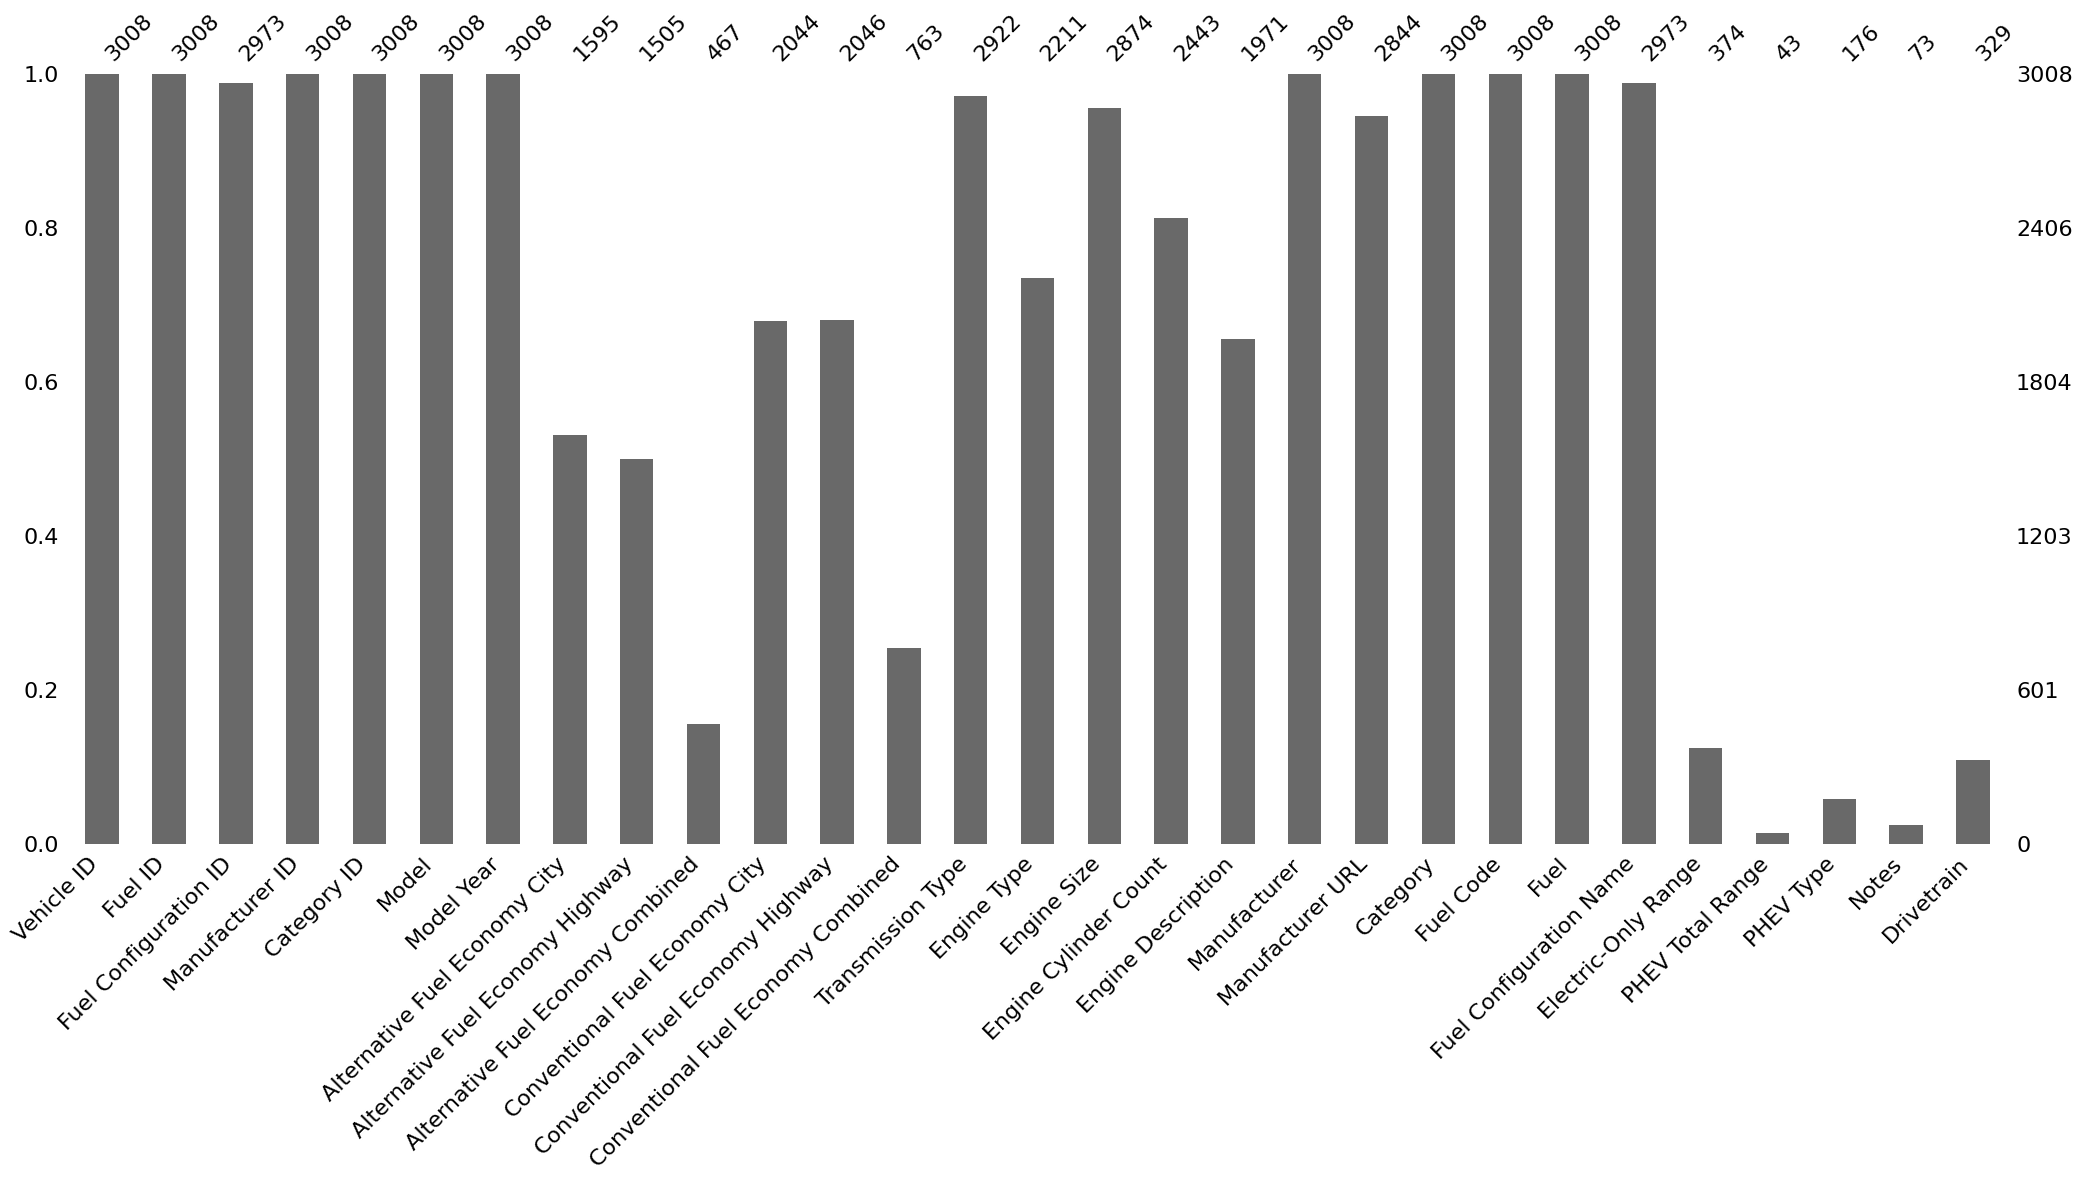

In [9]:
msno.bar(df1)

<Axes: >

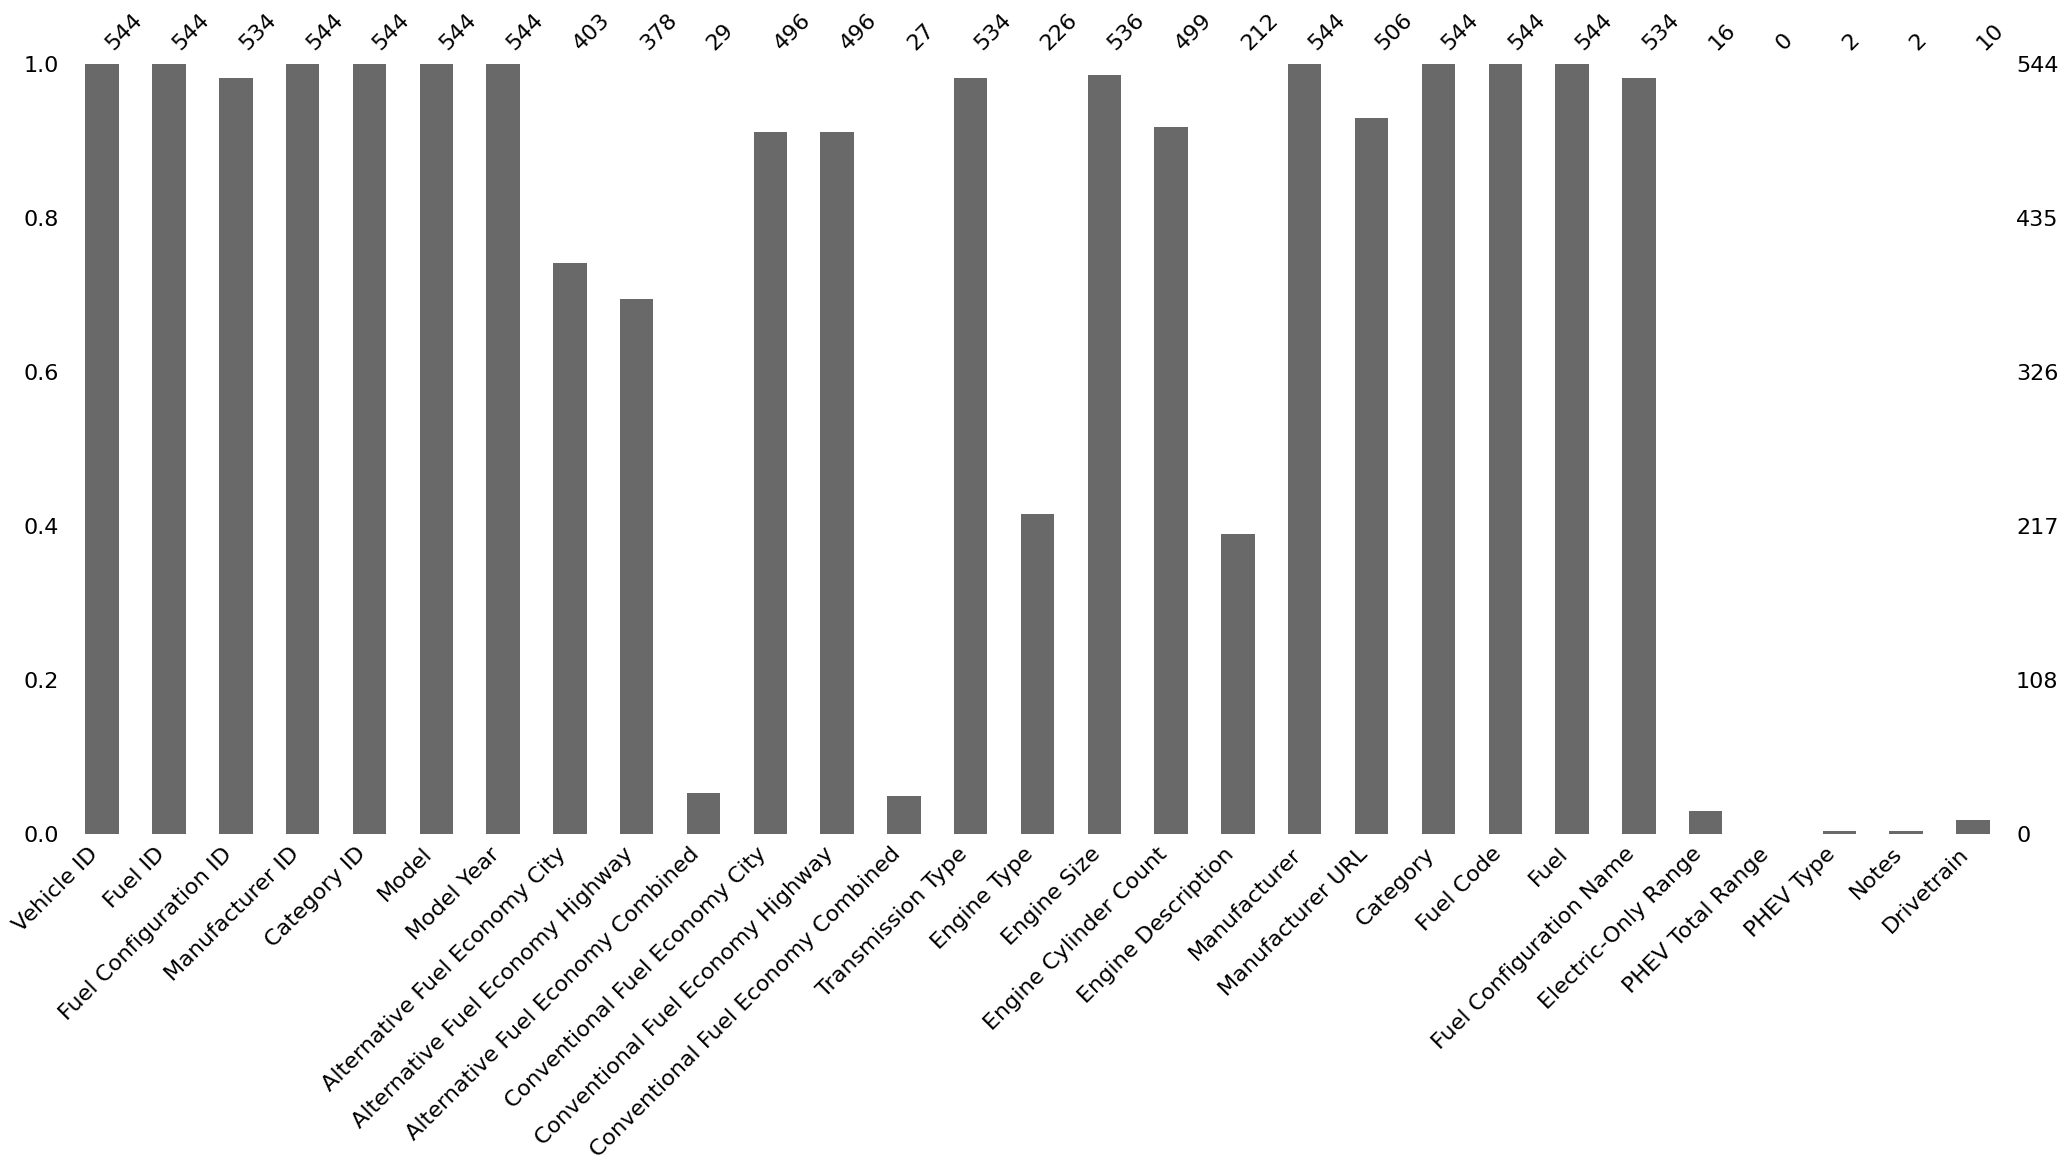

In [10]:
msno.bar(df1[df1.isnull().sum(axis=1) == 9])

In [11]:
df1.columns

Index(['Vehicle ID', 'Fuel ID', 'Fuel Configuration ID', 'Manufacturer ID',
       'Category ID', 'Model', 'Model Year', 'Alternative Fuel Economy City',
       'Alternative Fuel Economy Highway', 'Alternative Fuel Economy Combined',
       'Conventional Fuel Economy City', 'Conventional Fuel Economy Highway',
       'Conventional Fuel Economy Combined', 'Transmission Type',
       'Engine Type', 'Engine Size', 'Engine Cylinder Count',
       'Engine Description', 'Manufacturer', 'Manufacturer URL', 'Category',
       'Fuel Code', 'Fuel', 'Fuel Configuration Name', 'Electric-Only Range',
       'PHEV Total Range', 'PHEV Type', 'Notes', 'Drivetrain'],
      dtype='object')

In [12]:
df1['Notes'].unique()

array([nan, 'Transmission with Sport Mode.',
       'This vehicle is only available in certain states. See dealer for details.',
       'Includes Gasoline Particulate Filter',
       'Ford offers a “prep package” for this vehicle. An approved qualified vehicle modifier (QVM) can convert the vehicle to run on propane for delivery through select Ford dealerships, without impacting OEM warranties or service agreements.',
       'Ford offers a “prep package” for this vehicle. An approved qualified vehicle modifier (QVM) can convert the vehicle to run on CNG for delivery through select Ford dealerships, without impacting OEM warranties or service agreements.',
       'This model is also available with 22" wheels, at reduced fuel economy and all-electric range.',
       'This model is also available with 21" wheels, at reduced fuel economy and 334 miles range.',
       'This model is also available with 22" wheels, at reduced fuel economy and 300 miles range.',
       'GM offers a 6.0L "prep

- Con los valores unicos que nos da notes, y con la cantidad de valores totales 73 y son 3008 registros se descarta la columna 'Notes', además por la misma notación de Gaston se descartan las columnas PHEV Total Range y Engine Cylinder Count

In [13]:
df1_filtered = df1[['Vehicle ID', 'Fuel ID', 'Fuel Configuration ID', 'Manufacturer ID','Category ID', 'Model',
                    'Model Year', 'Alternative Fuel Economy City','Alternative Fuel Economy Highway', 'Conventional Fuel Economy City',
                    'Conventional Fuel Economy Highway','Conventional Fuel Economy Combined', 'Transmission Type',
                    'Engine Type', 'Engine Size', 'Engine Description', 'Manufacturer','Category',
                    'Fuel Code', 'Fuel', 'Fuel Configuration Name', 'Electric-Only Range','PHEV Type','Drivetrain']]
# 'Alternative Fuel Economy Combined' 467 registros de 3008
# 'Engine Cylinder Count' sale porque ya Gaston la sacó
# 'PHEV Total Range' sale por mantener uniformidad de los datos
# 'Notes' sale porque los valores no son importantes para ninguna tabla
# 'manufacturer URL' porque no nos sirve para nada

In [14]:
# Normalizamos esta columna, donde auto significa Automatic y Automatic|Manual y Manual|Automatic significan lo mismo.
df1_filtered['Transmission Type'].unique()

array(['Auto', nan, 'Manual', 'ECVT', 'Auto / Man', 'Automatic / 6 speed',
       'Semi-Automatic', 'Automatic / 4 speed', 'Automatic',
       'Automatic / 1 speed', 'Automatic / 5 speed', '6 speed Automatic',
       'CVT', 'Manual / 6 speed', '3 mode / 1 speed',
       'Automatic / 7 speed', 'ECVT / 8 speed', 'Automatic / Variable',
       'Automatic / 8 speed', 'Manual / 5 speed', '5-Speed Automatic',
       'V6, Hybrid, 3.5L', 'Automatic CVT', 'Continuously Variable',
       '4-speed automatic', '6-speed automatic', 'Variable automatic',
       '5-speed automatic', 'Automatic EVT', 'SOHC', 'Direct Drive',
       '7-speed automatic', 'Multispeed automatic', '6-speed manual',
       '4 speed automatic', '5 Speed Automatic', '4-speed automatic,',
       'Manual 5-Speed or CVT', '5-speed auto with o/d',
       'Automatic (CVT)', 'electronic, 4-speed automatic',
       'electronic 4-speed automatic', '4-speed automatic, overdrive',
       'Single-speed automatic', '4-speed auto or 5 spee

In [15]:
df1_filtered.dropna()


,Vehicle ID,Fuel ID,Fuel Configuration ID,Manufacturer ID,Category ID,Model,Model Year,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Conventional Fuel Economy City,...,Engine Size,Engine Description,Manufacturer,Category,Fuel Code,Fuel,Fuel Configuration Name,Electric-Only Range,PHEV Type,Drivetrain


In [16]:
df1_filtered.columns

Index(['Vehicle ID', 'Fuel ID', 'Fuel Configuration ID', 'Manufacturer ID',
       'Category ID', 'Model', 'Model Year', 'Alternative Fuel Economy City',
       'Alternative Fuel Economy Highway', 'Conventional Fuel Economy City',
       'Conventional Fuel Economy Highway',
       'Conventional Fuel Economy Combined', 'Transmission Type',
       'Engine Type', 'Engine Size', 'Engine Description', 'Manufacturer',
       'Category', 'Fuel Code', 'Fuel', 'Fuel Configuration Name',
       'Electric-Only Range', 'PHEV Type', 'Drivetrain'],
      dtype='object')

In [17]:
df1_filtered.head()

,Vehicle ID,Fuel ID,Fuel Configuration ID,Manufacturer ID,Category ID,Model,Model Year,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Conventional Fuel Economy City,...,Engine Size,Engine Description,Manufacturer,Category,Fuel Code,Fuel,Fuel Configuration Name,Electric-Only Range,PHEV Type,Drivetrain
0,13044,45,9.0,365,27,NSX,2022,NaN,NaN,21.0,...,3.5L,3.5L V6,Acura,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,AWD
1,12854,45,9.0,377,27,A3,2022,NaN,NaN,29.0,...,2.0L,2.0L I4,Audi,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,FWD
2,12842,45,9.0,377,27,A3 quattro,2022,NaN,NaN,28.0,...,2.0L,2.0L I4,Audi,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,AWD
3,12783,45,9.0,377,27,A4 allroad quattro,2022,NaN,NaN,24.0,...,2.0L,2.0L I4,Audi,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,AWD
4,12782,45,9.0,377,27,A4 quattro,2022,NaN,NaN,26.0,...,2.0L,2.0L I4,Audi,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,AWD


In [18]:
df1_filtered[df1_filtered['Vehicle ID'].duplicated()]


,Vehicle ID,Fuel ID,Fuel Configuration ID,Manufacturer ID,Category ID,Model,Model Year,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Conventional Fuel Economy City,...,Engine Size,Engine Description,Manufacturer,Category,Fuel Code,Fuel,Fuel Configuration Name,Electric-Only Range,PHEV Type,Drivetrain


In [19]:
df1_filtered.to_csv('./Datasets_clean/' + dict_files['df5'], index=False)